# Regresión Lineal Simple. Un ejemplo minimalista

### Importar las librerías relevantes

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para graficar en 3-D

### Generar datos al azar para entrenar al modelo

Se trabajará con dos variables de entrada, las x1 y x2 en los ejemplos vistos en clase. Se generan al azar a partir de una distribución uniforme.

Se creará una matriz con estas dos variables.  La matriz X del modelo lineal y = x * w + b

In [3]:
# Por facilidad, se declara una variable para indicar el tamaño del conjunto 
#      de datos de entrenamiento. Puede probarse con 100,000 o 1,000,000 pero hay 
#      que tener cuidado ya que con tantas observaciones puede que la máquina se quede!

observaciones = 1000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1,x2))

# Verificar la forma de la matriz 
# Debiera ser n x k, donde n es el número de observaciones, y k es el número de variables.

print (X.shape)

(1000, 2)


In [13]:
X

array([[ 9.25787473, -9.04191799],
       [ 9.15358852, -8.98374039],
       [-5.86044346,  7.2456378 ],
       ...,
       [ 0.5646018 , -9.12741301],
       [ 2.46851202, -7.4096792 ],
       [ 7.45361606, -0.93643351]])

### Generar las metas a las que debemos apuntar

Para el modelo se usará la función f(x1, x2) = 2 * x1 - 3 * x2 + 5 + <ruido pequeño>.  El ruido es para hacerlo más realista.

Se utiliza la metodología de ML, y al finalizar se determinará si el algoritmo la ha aprendido.  

Al utilizar esta función, se espera que la red neuronal genere los pesos w1 = 2, w2 = -3 y el sesgo b = 5.  Si no se logra, es que algo se ha hecho mal. 

In [4]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

metas = 2 * x1 - 3 * x2 + 5 + ruido

# Verificar las dimensiones. Deben ser n x m, donde m es el número de variables de salida.
print (metas.shape)

(1000, 1)


### Graficar los datos a usar para el entrenamiento

La idea es ver que haya una fuerte tendencia que el modelo debe aprender a reproducir.


In [5]:
print(x1.shape)
print(x2.shape)
print(metas.shape)

(1000, 1)
(1000, 1)
(1000, 1)


In [6]:
x1N = x1.reshape(observaciones,)
x2N = x2.reshape(observaciones,)
metasN = metas.reshape(observaciones,)

fig = px.scatter_3d(x = x1N, y = x2N, z = metasN)

fig.update_layout(
    width = 500,
    height = 500,)

fig.show()

### Inicializar variables

Se inicializan los pesos y sesgos, al azar, dentro de un rango inicial pequeño.  Es posible "jugar" con este valor pero no es recomendable ya que el uso de rangos iniciales altos inhibe el aprendizaje por parte del algoritmo

Los pesos son de dimensiones k x m, donde k es el numero de variables de entrada y m es el número de variables de salida.  

Como solo hay una salida, el sesgo es de tamaño 1, y es un escalar

In [7]:
rango_inicial = 0.1     #  valor máximo para los pesos y sesgos iniciales

pesos = np.random.uniform(low = -rango_inicial, high = rango_inicial, size = (2, 1))

sesgos = np.random.uniform(low = -rango_inicial, high = rango_inicial, size = 1)

#Ver cómo fueron inicializados.
print (pesos)
print (sesgos)

[[-0.09728125]
 [ 0.07712682]]
[0.03301771]


In [8]:
pesos.shape

(2, 1)

### Asignar la tasa de aprendizaje (Eta)

Se asigna una tasa de aprendizaje pequeña.  Para este ejemplo funciona bien 0.02.  Vale la pena "jugar" con este valor para ver los resultados de hacerlo.

In [9]:
eta = 0.02

### Entrenar el modelo

Se utilizará un valor de 100 para iterar el modelo con el conjunto de datos de entrenamiento.  Ese valor funciona bastante bien con la tasa de aprendizaje de 0.02.  Cómo saber el número adecuado de iteraciones es algo que se verá en futuras sesiones, pero generalmente una tasa de aprendizaje baja requiere de más iteraciones que una más alta.  Sin embargo hay que tener en mente que una tasa de aprendizaje alta puede causar que la pérdida "Loss" diverja a infinito, en vez de converger a cero (0)

Puesto que esta es una regresión, se usará la función de pérdida L2-norm (dividido por 2, para ser consistente con la clase).  Es más, también se dividirá por el número de observaciones para obtener un promedio de pérdida por observación.  Se discutió en clase sobre la libertad de modificar esta función una vez no se pierda la característica de ser más baja para los resultados mejores, y vice versa.

Se mostrará la función de pérdida (loss) en cada iteración, para ver si está decreciendo como se desea.

Otro pequeño truco es escalar las deltas de la misma manera que se hizo con la función de pérdida.  De esta forma la tasa de aprendizaje es independiente del número de observaciones.  De nuevo esto no cambia el principio, solo hace más fácil la selección de una tasa única de aprendizaje. 

Finalmente se aplica la regla de actualización del decenso de gradiente.

Ojo!  los pesos son de dimensión 2 X 1, la tasa de aprendizaje es 1 X 1 (escalar), las entradas son 1000 X 2, y las deltas escaladas son 1000 X 1.  Es necesario obtener la transpuesta de las entradas para que no hayan problemas de dimensión en las operaciones. 



0.1718604236702571
0.1718576870345741
0.1718550584167132
0.17185253355310007
0.17185010834844772
0.17184777886911462
0.1718455413367243
0.1718433921220364
0.17184132773906022
0.17183934483940125
0.17183744020682895
0.17183561075206114
0.17183385350775268
0.17183216562368264
0.1718305443621308
0.17182898709343825
0.17182749129174105
0.17182605453087343
0.1718246744804336
0.17182334890200246
0.171822075645514
0.1718208526457671
0.17181967791907693
0.17181854956005618
0.17181746573852524
0.1718164246965436
0.17181542474555864
0.17181446426366642
0.17181354169298124
0.17181265553710892
0.17181180435871937
0.17181098677721532
0.17181020146649328
0.17180944715279226
0.17180872261262803
0.17180802667080855
0.1718073581985276
0.17180671611153445
0.17180609936837465
0.17180550696870092
0.17180493795165103
0.17180439139428863
0.17180386641010703
0.17180336214759034
0.17180287778883332
0.17180241254821405
0.17180196567112
0.17180153643272408
0.17180112413680854
0.1718007281146364
0.17180034772386

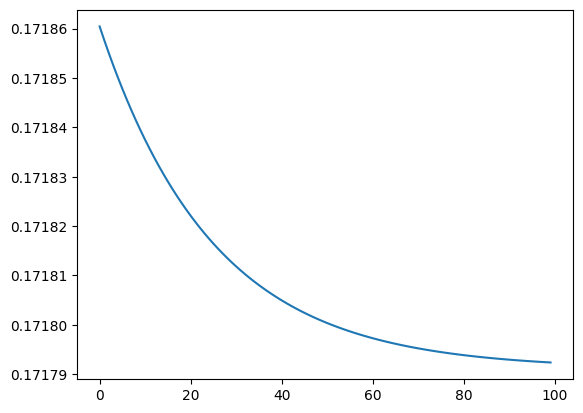

In [16]:
lista_perdidas = []

for i in range (100):
    
    # Esta es la ecuacion del modelo lineal: y = xw + b 
    y = np.dot(X, pesos) + sesgos
    
    # Las deltas son las diferencias entre las salidas y las metas (targets)
    # deltas es un vector 1000 x 1
    deltas = y - metas
        
    perdida = np.sum(deltas ** 2) / 2 / observaciones

    lista_perdidas.append(perdida)
    
    print(perdida)
    
    deltas_escaladas = deltas / observaciones
      
    pesos = pesos - eta * np.dot(X.T, deltas_escaladas)
    sesgos = sesgos - eta * np.sum(deltas_escaladas)
    
    # Los pesos son actualizados en forma de algebra lineal(una matriz menos otra)
    # Sin embargo, los sesgos en este caso son solo un número (solo se calcula una salida), 
    #       es necesario transformar las deltas a un escalar.      
    # Ambas líneas son consistentes con la metodología de decenso de gradiente

plt.plot(lista_perdidas)

### Desplegar los pesos y el sesgo para ver si funcionaron correctamente.

Por el diseño de los datos, los pesos finales deben ser 2 y -3, y el sesgo: 5

**NOTA:**  Si aún no están los valores correctos, puede que aún estén convergiendo y sea necesario iterar más veces.  Para esto solo se requiere ejecutar la celda anterior cuantas veces sea requerido

In [11]:
print(pesos, sesgos)      

[[ 2.00798712]
 [-2.99767682]] [4.33043751]


### Graficar las últimas salidas vrs las metas (targets)

Como son los últimos valores, luego del entrenamiento, representan la exactitut del modelo final de.  Entre más cercana esté esta gráfica a una línea de 45 grados, más cercanas están las salidas y metas.

Como este ejemplo es pequeño, es posible hacerlo, en los problemas que se veran posteriormente en el curso, esto ya no sería posible.

In [12]:
yN = y.reshape(observaciones,)
metasN = metas.reshape(observaciones,)
fig = px.scatter(x = yN, y =  metasN)

fig.update_layout(
    width = 400,
    height = 400,)

fig.show()